In [7]:
import pandas as pd
import matplotlib.pyplot as plt

netflix_dados = pd.read_csv('../dados/netflix daily top 10.csv', sep=',')
netflix_dados['As of'] = pd.to_datetime(netflix_dados['As of'])

In [8]:
netflix_dados.head(2)

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
0,2020-04-01,1,1,1,"Tiger King: Murder, Mayhem …",TV Show,Yes,"Mar 20, 2020",9,90
1,2020-04-01,2,2,-,Ozark,TV Show,Yes,"Jul 21, 2017",5,45


### Tipos de dados disponíveis

In [9]:
netflix_dados.dtypes

As of                   datetime64[ns]
Rank                             int64
Year to Date Rank               object
Last Week Rank                  object
Title                           object
Type                            object
Netflix Exclusive               object
Netflix Release Date            object
Days In Top 10                   int64
Viewership Score                 int64
dtype: object

### Período da análise feita

In [11]:
print(f'Data de Inicio: {netflix_dados['As of'].min()}')
print(f'Data de Fim: {netflix_dados['As of'].max()}')

Data de Inicio: 2020-04-01 00:00:00
Data de Fim: 2022-03-11 00:00:00


### Tamanho da base de dados

In [13]:
print(f'QTD de linhas: {netflix_dados.shape[0]}\n'
      f'QTD de colunas: {netflix_dados.shape[1]}')

QTD de linhas: 7100
QTD de colunas: 10


### Verificar dados nulos

In [14]:
netflix_dados.isna().sum()

As of                      0
Rank                       0
Year to Date Rank          0
Last Week Rank             0
Title                      0
Type                       0
Netflix Exclusive       2501
Netflix Release Date       0
Days In Top 10             0
Viewership Score           0
dtype: int64

### Outliers

<Axes: >

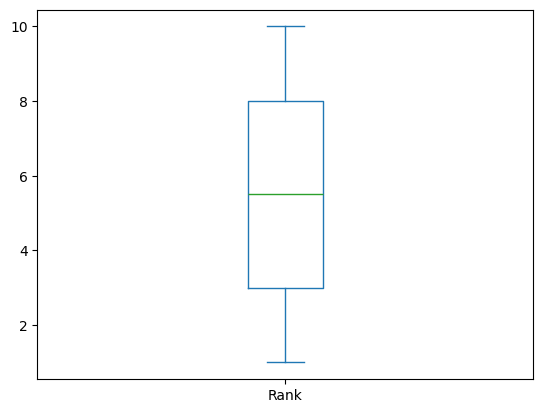

In [16]:
netflix_dados['Rank'].plot.box()

Para a identificação de outiliers utilizaremos o Intervalo Interquartil (IQR).

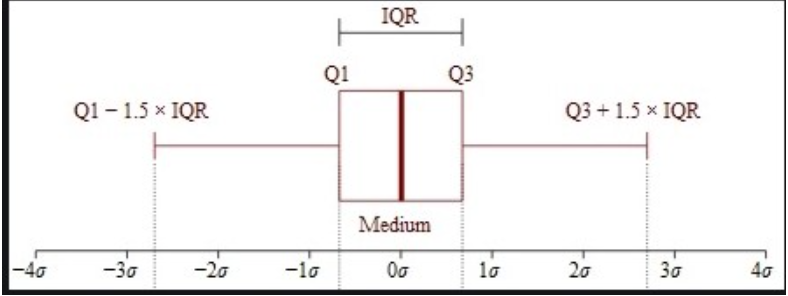

<Axes: >

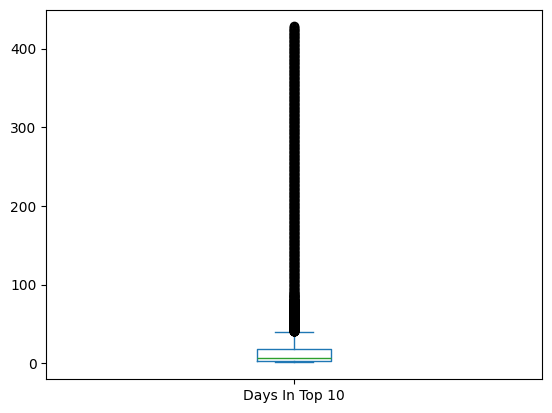

In [17]:
netflix_dados['Days In Top 10'].plot.box()

In [25]:
q1 = netflix_dados['Days In Top 10'].quantile(.25)
q3 = netflix_dados['Days In Top 10'].quantile(.75)
iqr = q3 - q1
lin_inf = q1 - 1.5*iqr
lin_sup = q3 + 1.5*iqr
print(f'Valores acima de {lin_sup} são Outiliers\n'
      f'Valores abaixo de {lin_inf} são outilires')
daysintop10_sem_outiliers = netflix_dados[(netflix_dados['Days In Top 10'] > lin_inf) &  (netflix_dados['Days In Top 10'] < lin_sup)]

Valores acima de 40.5 são Outiliers
Valores abaixo de -19.5 são outilires


<Axes: >

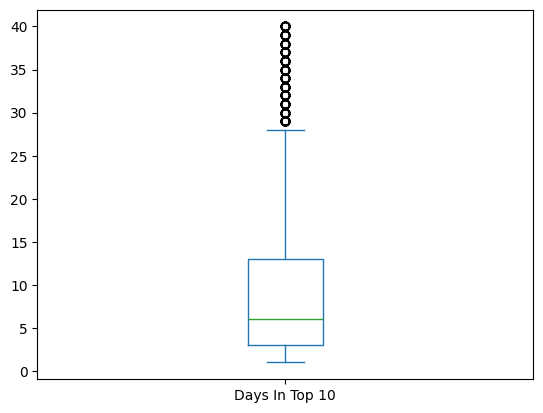

In [27]:
daysintop10_sem_outiliers['Days In Top 10'].plot.box()

<Axes: >

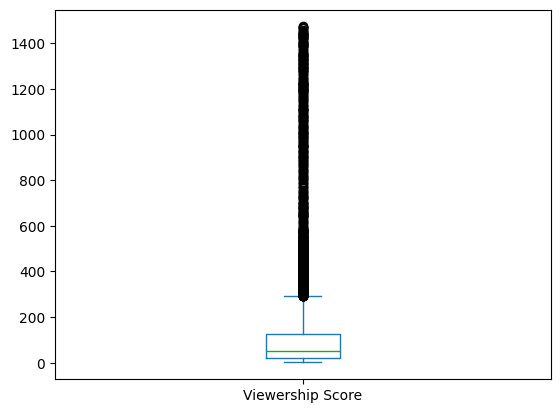

In [18]:
netflix_dados['Viewership Score'].plot.box()

In [28]:
q1 = netflix_dados['Viewership Score'].quantile(.25)
q3 = netflix_dados['Viewership Score'].quantile(.75)
iqr = q3 - q1
lin_inf = q1 - 1.5*iqr
lin_sup = q3 + 1.5*iqr
print(f'Valores acima de {lin_sup} são Outiliers\n'
      f'Valores abaixo de {lin_inf} são outilires')
ViewershipScore_sem_outiliers = netflix_dados[(netflix_dados['Viewership Score'] > lin_inf) &  (netflix_dados['Viewership Score'] < lin_sup)]

Valores acima de 291.5 são Outiliers
Valores abaixo de -144.5 são outilires


<Axes: >

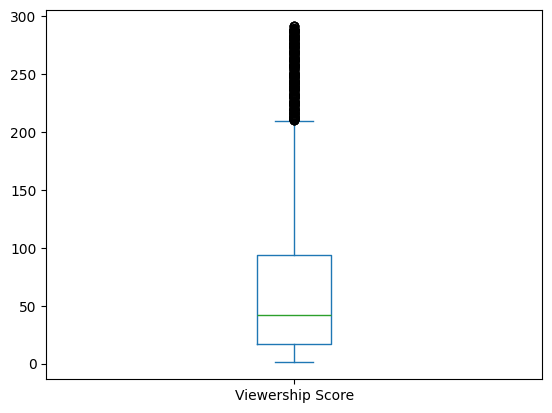

In [30]:
ViewershipScore_sem_outiliers['Viewership Score'].plot.box()